# SVM 
## Data Cleansing

### ADULT Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets 
adult = pd.read_csv('adult.data')
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education num', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'capital gain', 'capital loss', 'hours per week', 'country', 'income']

#replaces any empty spots with a blank space
adult['workclass'] = adult['workclass'].replace(' ?', np.nan)
adult['occupation'] = adult['occupation'].replace(' ?', np.nan)
adult['country'] = adult['country'].replace(' ?', np.nan)

#takes out any blank spaces in the dataset
adult.dropna(how='any', inplace=True)

#drops fnlwgt column
adult.drop(['fnlwgt'], axis=1, inplace=True)

#one-hot encoding
adult['workclass'] = adult['workclass'].map({' Self-emp-not-inc': 0,
                                            ' Self-emp-inc': 1,
                                            ' Local-gov': 2,
                                            ' State-gov': 3,
                                            ' Federal-gov': 4,
                                            ' Private': 5,
                                            ' Without-pay': 6,})
adult['education'] = adult['education'].map({' Preschool': 0,
                                            ' 1st-4th': 1,
                                            ' 5th-6th': 2,
                                            ' 7th-8th': 3,
                                            ' 9th': 4,
                                            ' 10th': 5,
                                            ' 11th': 6,
                                            ' 12th': 7,
                                            ' HS-grad': 8,
                                            ' Some-college': 9,
                                            ' Assoc-acdm': 10,
                                            ' Assoc-voc': 11,
                                            ' Bachelors': 12,
                                            ' Masters': 13,
                                            ' Doctorate': 14,
                                            ' Prof-school': 15})
adult['marital status'] = adult['marital status'].map({' Never-married': 0,
                                                      ' Married-civ-spouse': 1,
                                                      ' Married-AF-spouse': 2,
                                                      ' Married-spouse-absent': 3,
                                                      ' Divorced': 4,
                                                      ' Separated': 5,
                                                      ' Widowed': 6})
adult['occupation'] = adult['occupation'].map({' Exec-managerial': 0,
                                              ' Handlers-cleaners': 1,
                                              ' Prof-specialty': 2,
                                              ' Other-service': 3,
                                              ' Adm-clerical': 4,
                                              ' Sales': 5,
                                              ' Transport-moving': 6,
                                              ' Farming-fishing': 7,
                                              ' Machine-op-inspct': 8,
                                              ' Tech-support': 9,
                                              ' Craft-repair': 10,
                                              ' Protective-serv': 11,
                                              ' Armed-Forces': 12,
                                              ' Priv-house-serv': 13})
adult['relationship'] = adult['relationship'].map({' Husband': 0,
                                                  ' Not-in-family': 1,
                                                  ' Wife': 2,
                                                  ' Own-child': 3,
                                                  ' Unmarried': 4,
                                                  ' Other-relative': 5})
adult['race'] = adult['race'].map({' White': 0, ' Black': 1, 
                                  ' Asian-Pac-Islander': 2,
                                  ' Amer-Indian-Eskimo': 3,
                                  ' Other': 4})
adult['country'] = np.where(adult['country'] != ' United-States', 0, 1)
adult['sex'] = adult['sex'].map({' Male': 0, ' Female': 1})
adult['income'] = adult['income'].map({' <=50K': 0, ' >50K': 1})
adult.head()

,age,workclass,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,50,0,12,13,1,0,0,0,0,0,0,13,1,0
1,38,5,8,9,4,1,1,0,0,0,0,40,1,0
2,53,5,6,7,1,1,0,1,0,0,0,40,1,0
3,28,5,12,13,1,2,2,1,1,0,0,40,0,0
4,37,5,13,14,1,0,2,0,1,0,0,40,1,0


### LETTER Dataset

In [2]:
letter = pd.read_csv('letter-recognition.data')
letter.columns = ['lettr', 'x-box', 'y-box', 'width', 'height', 
                  'pixels', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 
                  'xybar', 'x2ybr', 'xy2br', 'x ege', 'xegvy',
                  'y-ege', 'yegvx']

#one-hot encoding
letter['lettr'] = letter['lettr'].map({
    'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'I':0,
    'J':0, 'K':0, 'L':0, 'M':0, 'N':1, 'O':1, 'P':1, 'Q':1, 'R':1,
    'S':1, 'T':1, 'U':1, 'V':1, 'W':1, 'X':1, 'Y':1, 'Z':1})
letter.head()

,lettr,x-box,y-box,width,height,pixels,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x ege,xegvy,y-ege,yegvx
0,0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,0,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,1,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,0,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,1,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


### CHESS Dataset

In [3]:
chess = pd.read_csv('krkopt.data')
chess.columns = ['White King file', 'White King rank', 'White Rook file',
                 'White Rook rank', 'Black King file', 
                 'Black King rank', 'Optimal Depth of Win']

#one-hot encoding
chess['White King file'] = chess['White King file'].map({'a': 0, 'b': 1,
                                                        'c': 2, 'd': 3})
chess['White Rook file'] = chess['White Rook file'].map({'a': 0, 'b': 1,
                                                        'c': 2, 'd': 3,
                                                        'e': 4, 'f': 5,
                                                        'g': 6, 'h': 7})
chess['Black King file'] = chess['Black King file'].map({'a': 0, 'b': 1,
                                                        'c': 2, 'd': 3,
                                                        'e': 4, 'f': 5,
                                                        'g': 6, 'h': 7})
chess['Optimal Depth of Win'] = chess['Optimal Depth of Win'].map({
    'zero': 1, 'one': 1, 'two': 1, 'three': 1, 'four': 1, 'five': 1,
    'six': 1, 'seven': 1, 'eight': 1, 'nine': 0, 'ten': 0, 'eleven': 0,
    'twelve': 0, 'thirteen': 0, 'fourteen': 0, 'fifteen': 0, 
    'sixteen': 0, 'draw': 0})
chess.head()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,Optimal Depth of Win
0,0,1,2,1,2,2,0
1,0,1,2,1,3,1,0
2,0,1,2,1,3,2,0
3,0,1,2,2,2,1,0
4,0,1,2,2,2,3,0


### OCCUPANCY Dataset

In [4]:
occupancy = pd.read_csv('occupancy_data.txt')

#drop unnecessary column
occupancy = occupancy.drop('date',axis=1)
occupancy.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


## Data Analysis
### Scatter Plots
Below demonstrates how the data I use is not easily separable leading to me not choosing a high C-value for my SVMs

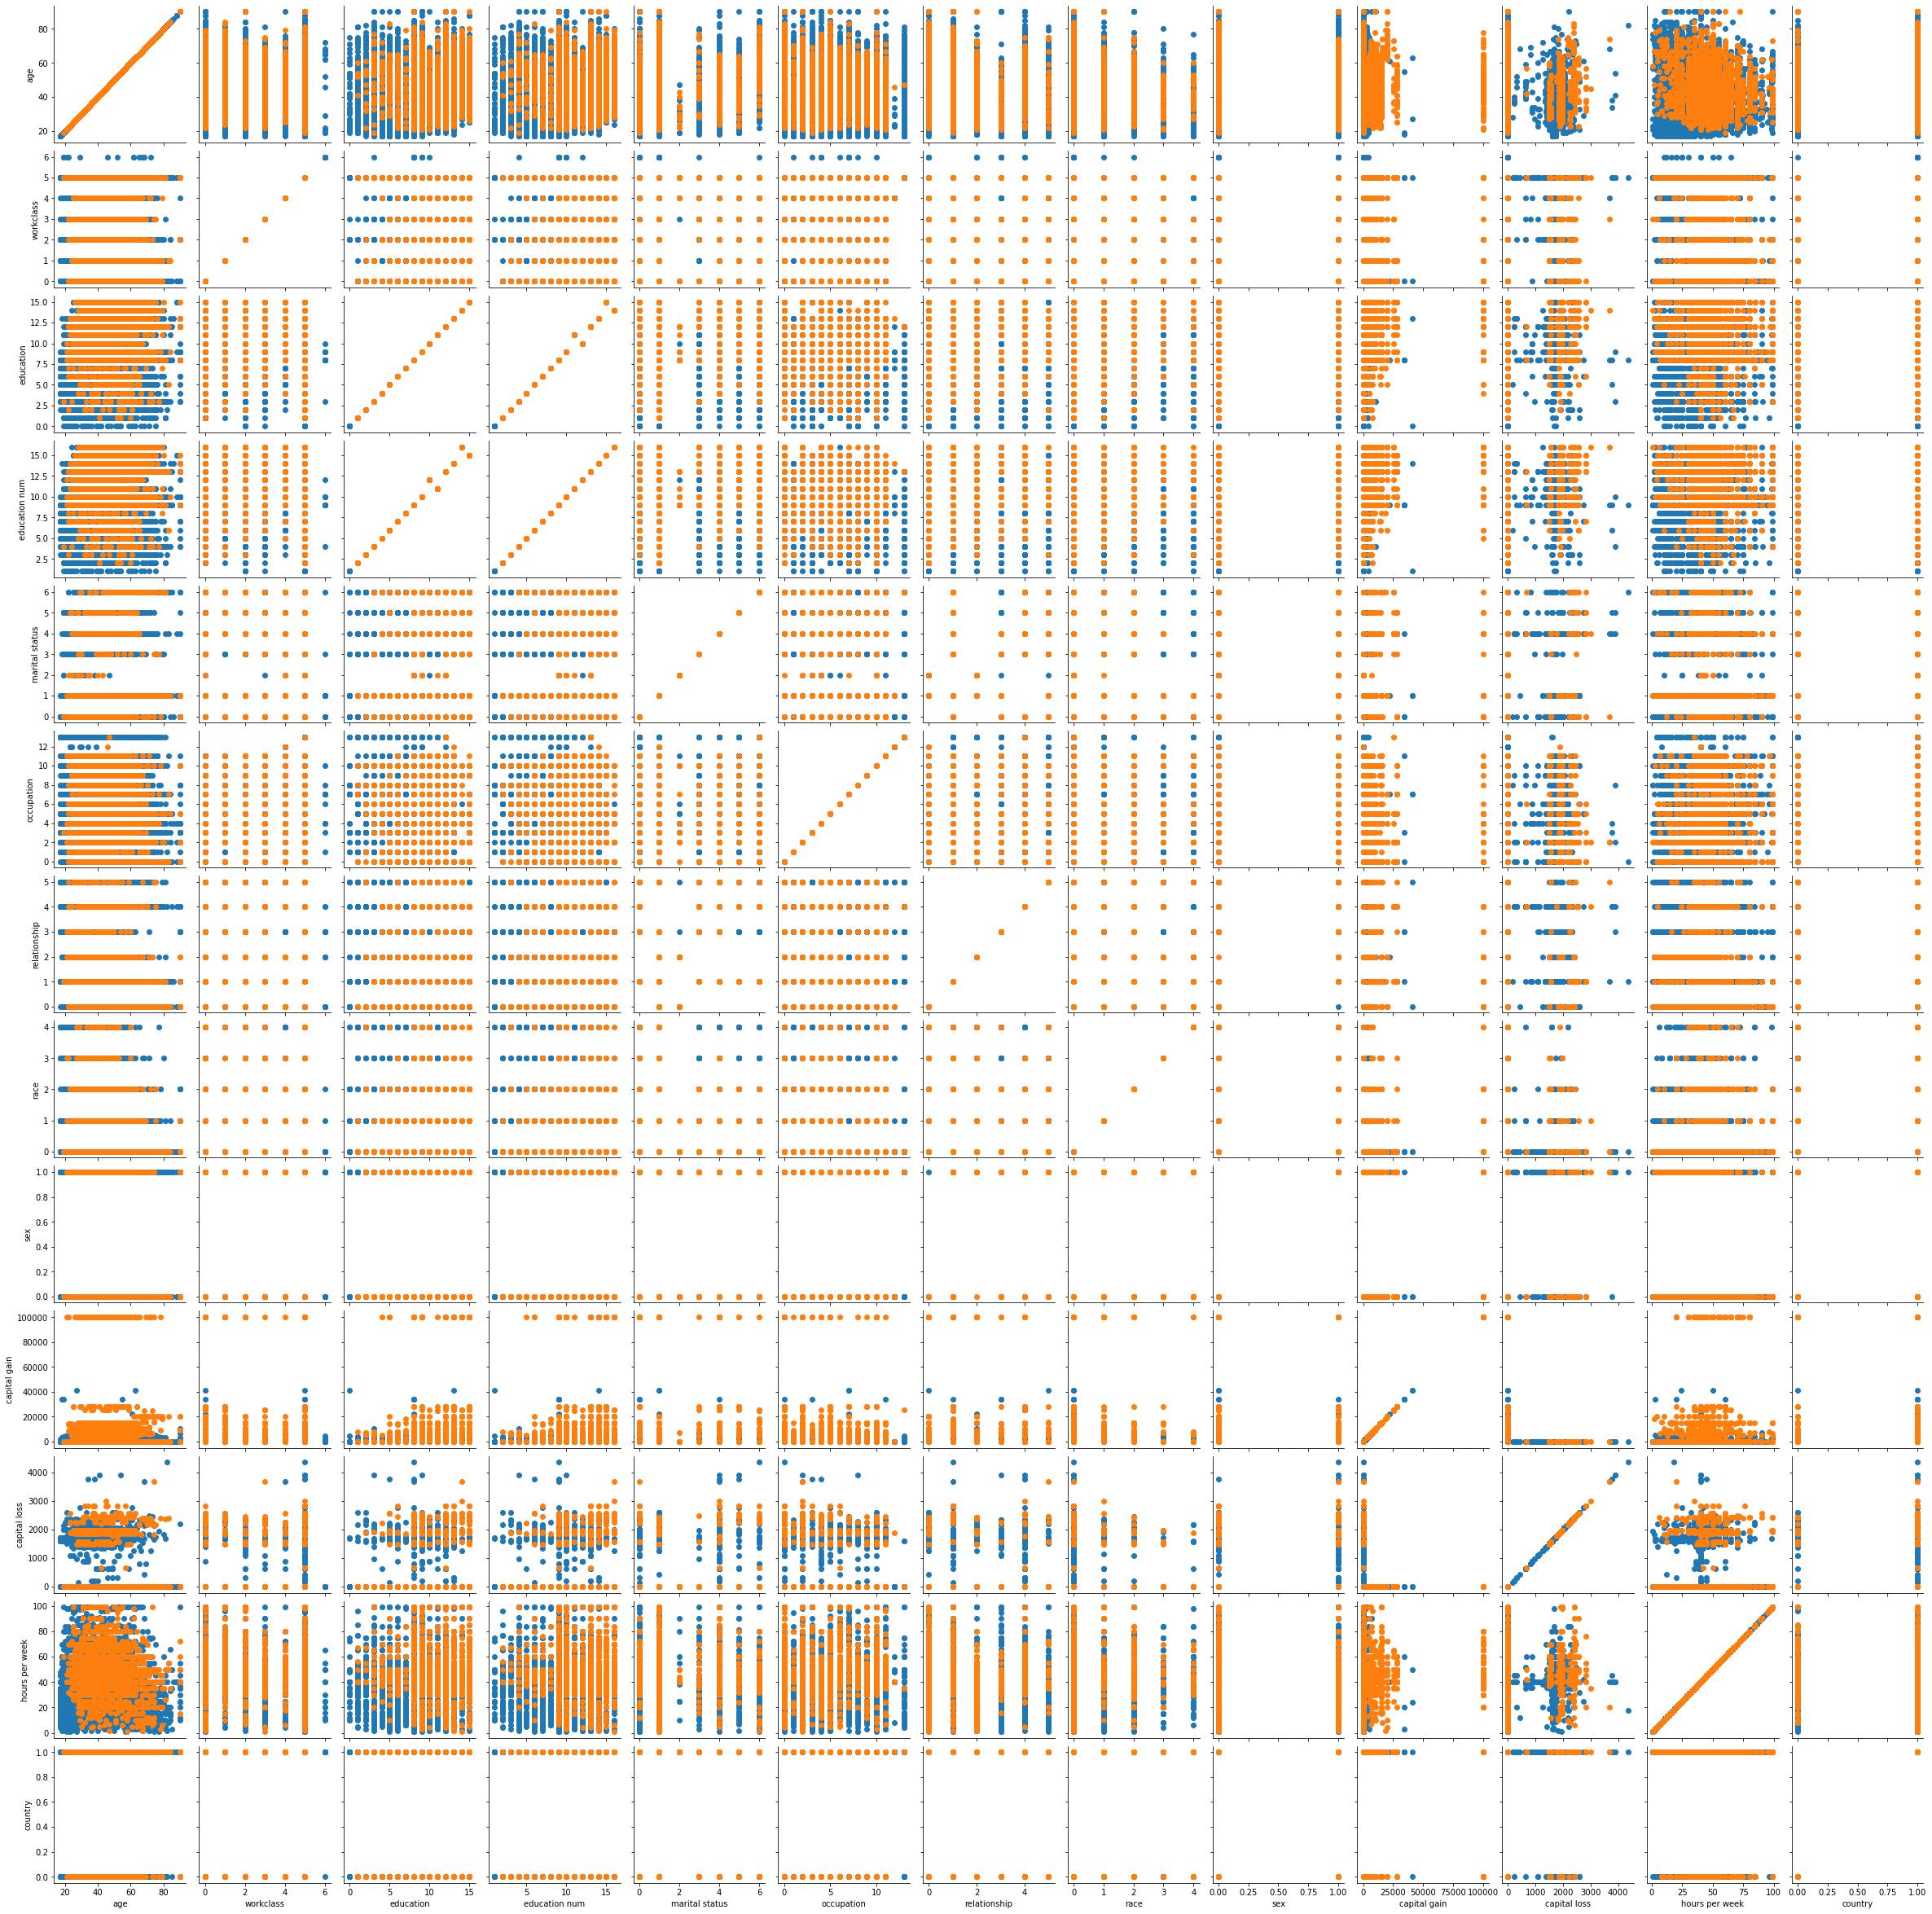

In [5]:
import seaborn as sns 
from matplotlib import pyplot as plt
a = sns.PairGrid(adult, hue="income")
a.map(plt.scatter);
plt.show()

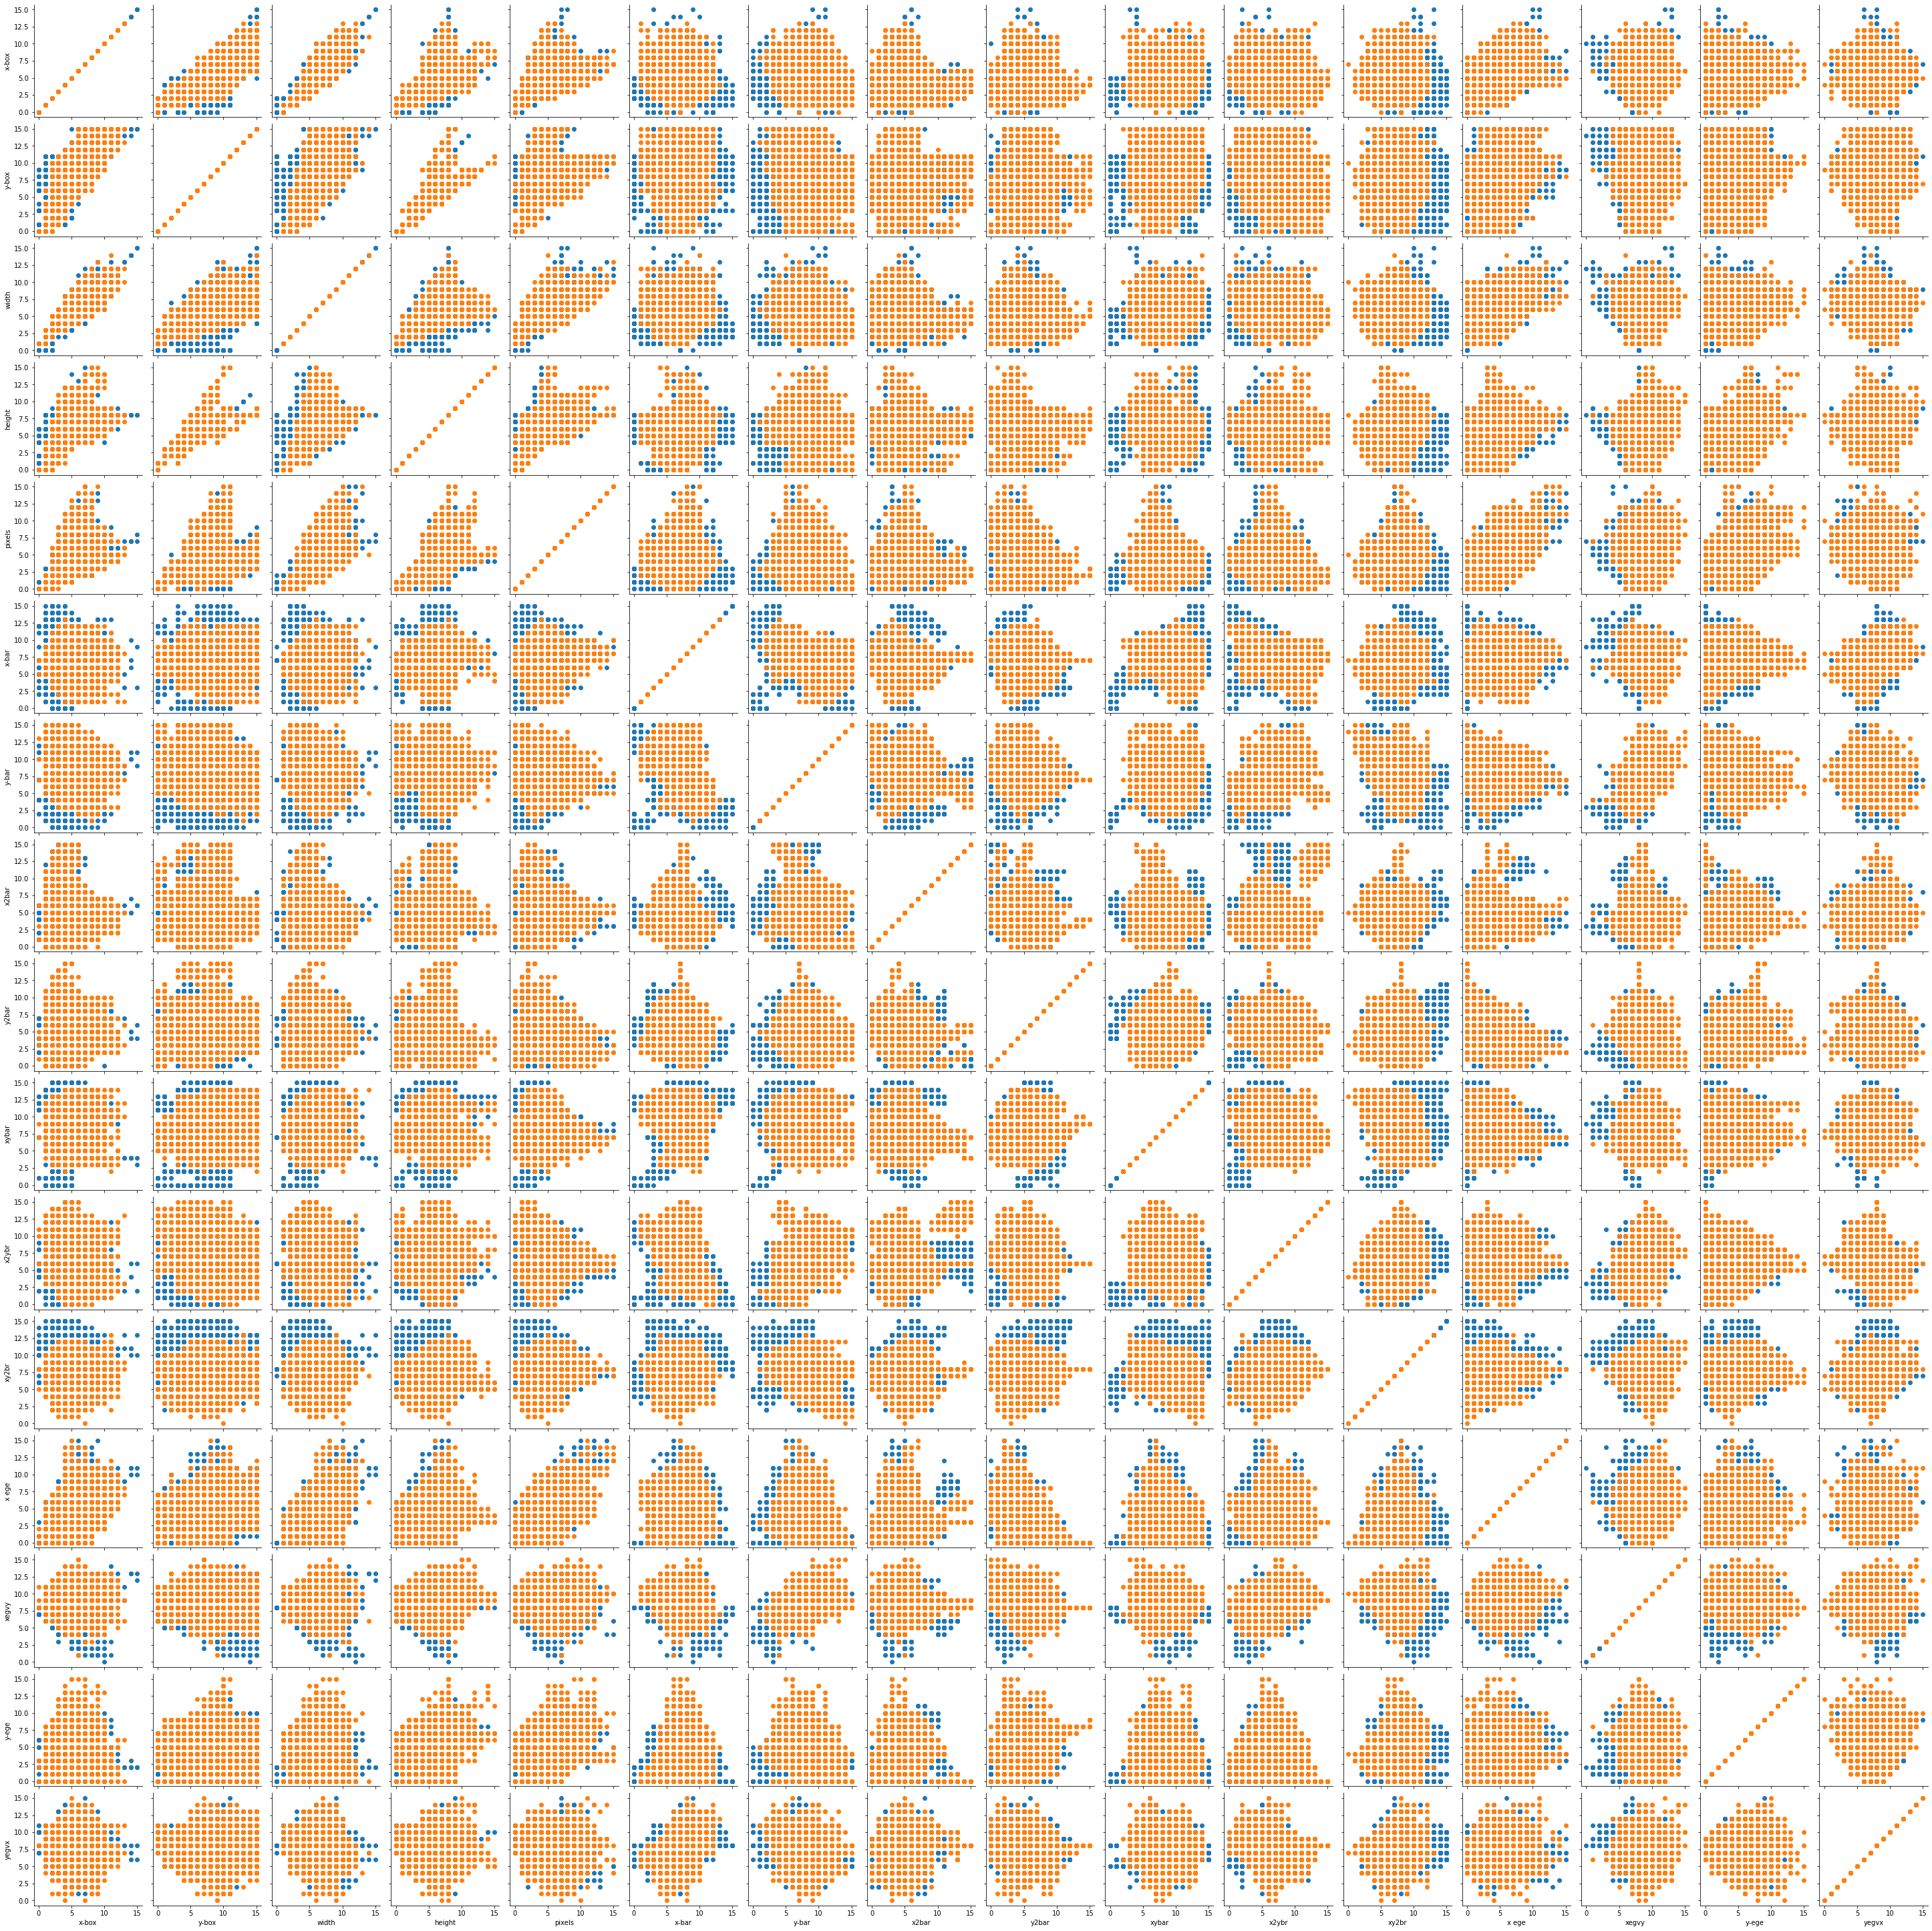

In [6]:
l = sns.PairGrid(letter, hue="lettr")
l.map(plt.scatter);
plt.show()

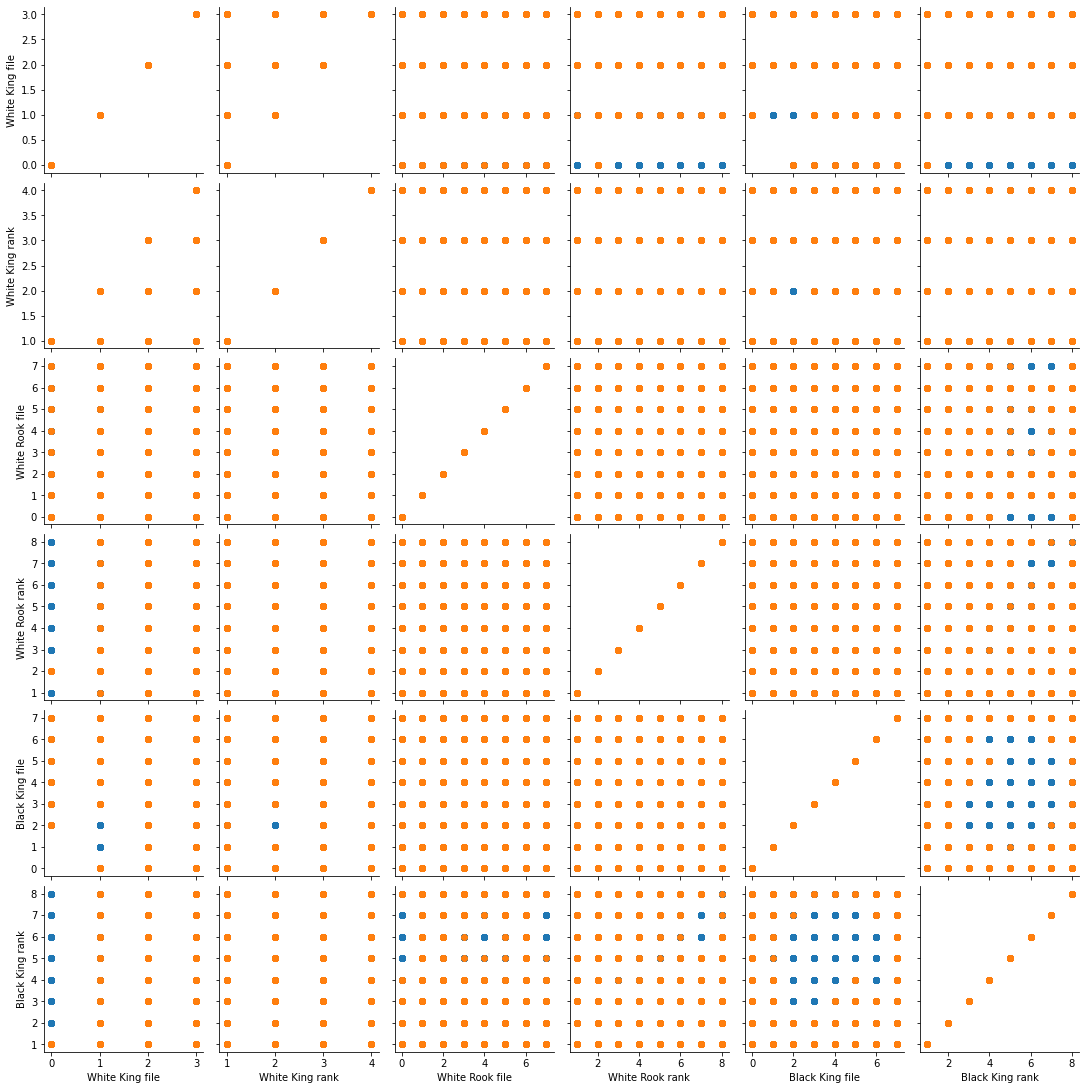

In [7]:
c = sns.PairGrid(chess, hue="Optimal Depth of Win")
c.map(plt.scatter);
plt.show()

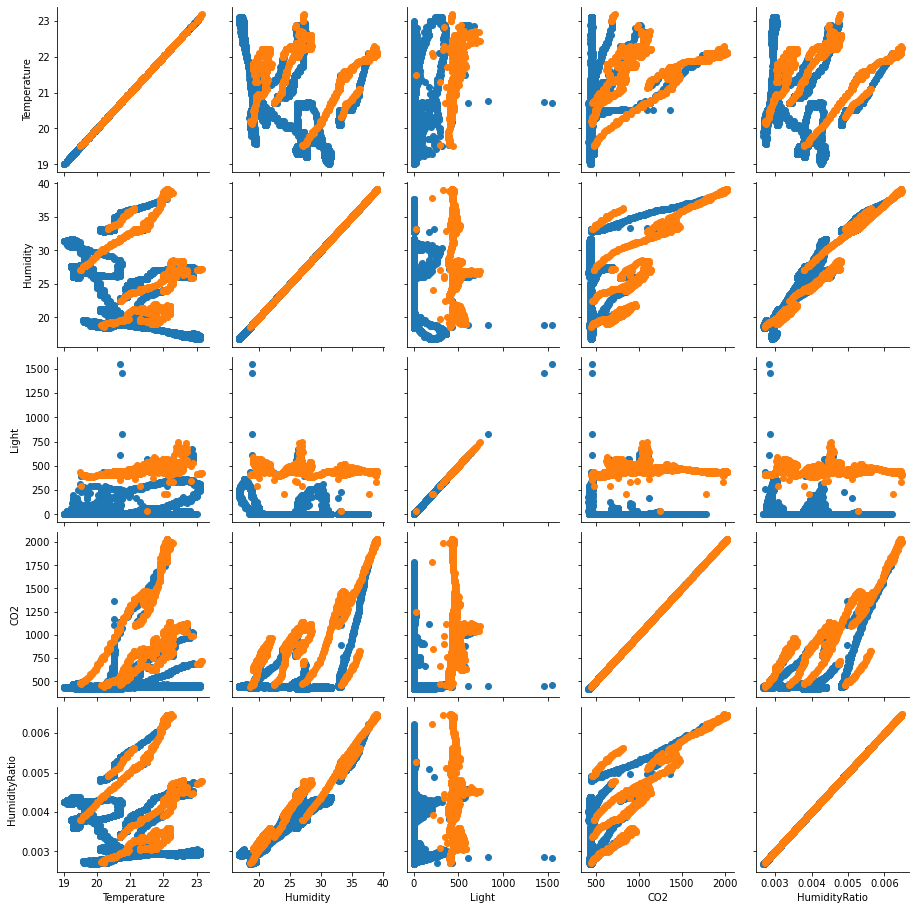

In [8]:
o = sns.PairGrid(occupancy, hue="Occupancy")
o.map(plt.scatter);
plt.show()

### Training SVM

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

NUM_TRIALS = 5

#adult data & target
X_a = adult.drop('income', axis=1)
Y_a = adult['income']

#letter data & target
X_l = letter.drop('lettr', axis=1)
Y_l = letter['lettr']

#chess data & target
X_c = chess.drop('Optimal Depth of Win', axis=1)
Y_c = chess['Optimal Depth of Win']

#occupancy data & target
X_o = occupancy.drop('Occupancy',axis=1)
Y_o = occupancy['Occupancy']

In [10]:
%%time 

svm = Pipeline([('scale', StandardScaler()),
                      ('classifier', SVC())])
X_a_train, X_a_test, Y_a_train, Y_a_test = train_test_split(X_a,Y_a,
                                                           train_size=5000)
X_l_train, X_l_test, Y_l_train, Y_l_test = train_test_split(X_l,Y_l,
                                                           train_size=5000)
X_c_train, X_c_test, Y_c_train, Y_c_test = train_test_split(X_c,Y_c,
                                                           train_size=5000)
X_o_train, X_o_test, Y_o_train, Y_o_test = train_test_split(X_o,Y_o,
                                                           train_size=5000)

search_space = [{'classifier': [SVC(max_iter=5000, probability=True)],
                'classifier__kernel': ['rbf'],
                'classifier__C': np.logspace(-7, 1, 9),
                'classifier__gamma': np.logspace(-6,-2,5)},
                
               {'classifier': [SVC(max_iter=5000, probability=True)],
               'classifier__kernel': ['linear'],
               'classifier__C': np.logspace(-7, 1, 9),
               'classifier__gamma': np.logspace(-6,-2,5)},
               
               {'classifier': [SVC(max_iter=5000, probability=True)],
               'classifier__kernel': ['rbf', 'linear'],
               'classifier__C': np.logspace(-7, 1, 9)}]
model = GridSearchCV(svm, 
                   search_space,
                   cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'],
                   n_jobs=-1,
                   refit=False,
                   verbose=3)

# Fit grid search
model_adult =  model.fit(X_a_train, Y_a_train)
model_letter =  model.fit(X_l_train, Y_l_train)
model_chess =  model.fit(X_c_train, Y_c_train)
model_occupancy =  model.fit(X_o_train, Y_o_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  8.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.2min


CPU times: user 6.33 s, sys: 518 ms, total: 6.85 s
Wall time: 15min 30s


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.7min finished


## Raw Tables

In [37]:
#function that finds the average
def avg(array):
    return sum(array)/len(array)

### Accuracy

In [47]:
adult_acc_1 = avg(model_adult.cv_results_['split0_test_accuracy'])
adult_acc_2 = avg(model_adult.cv_results_['split1_test_accuracy'])
adult_acc_3 = avg(model_adult.cv_results_['split2_test_accuracy'])
adult_acc_4 = avg(model_adult.cv_results_['split3_test_accuracy'])
adult_acc_5 = avg(model_adult.cv_results_['split4_test_accuracy'])
letter_acc_1 = avg(model_letter.cv_results_['split0_test_accuracy'])
letter_acc_2 = avg(model_letter.cv_results_['split1_test_accuracy'])
letter_acc_3 = avg(model_letter.cv_results_['split2_test_accuracy'])
letter_acc_4 = avg(model_letter.cv_results_['split3_test_accuracy'])
letter_acc_5 = avg(model_letter.cv_results_['split4_test_accuracy'])
chess_acc_1 = avg(model_chess.cv_results_['split0_test_accuracy'])
chess_acc_2 = avg(model_chess.cv_results_['split1_test_accuracy'])
chess_acc_3 = avg(model_chess.cv_results_['split2_test_accuracy'])
chess_acc_4 = avg(model_chess.cv_results_['split3_test_accuracy'])
chess_acc_5 = avg(model_chess.cv_results_['split4_test_accuracy'])
occupancy_acc_1 = avg(model_occupancy.cv_results_['split0_test_accuracy'])
occupancy_acc_2 = avg(model_occupancy.cv_results_['split1_test_accuracy'])
occupancy_acc_3 = avg(model_occupancy.cv_results_['split2_test_accuracy'])
occupancy_acc_4 = avg(model_occupancy.cv_results_['split3_test_accuracy'])
occupancy_acc_5 = avg(model_occupancy.cv_results_['split4_test_accuracy'])

In [48]:
svm_acc = [adult_acc_1, adult_acc_2, adult_acc_3, adult_acc_4, adult_acc_5,
          letter_acc_1, letter_acc_2, letter_acc_3, letter_acc_4, letter_acc_5,
          chess_acc_1, chess_acc_2, chess_acc_3, chess_acc_4, chess_acc_5,
          occupancy_acc_1, occupancy_acc_2, occupancy_acc_3, occupancy_acc_4, occupancy_acc_5]
svm_acc

[0.8662407407407409,
 0.8667499999999999,
 0.8648703703703705,
 0.8668518518518528,
 0.8658055555555564,
 0.8662407407407409,
 0.8667499999999999,
 0.8648703703703705,
 0.8668518518518528,
 0.8658055555555564,
 0.8662407407407409,
 0.8667499999999999,
 0.8648703703703705,
 0.8668518518518528,
 0.8658055555555564,
 0.8662407407407409,
 0.8667499999999999,
 0.8648703703703705,
 0.8668518518518528,
 0.8658055555555564]

### ROC AUC

In [50]:
adult_roc_1 = avg(model_adult.cv_results_['split0_test_roc_auc_ovr'])
adult_roc_2 = avg(model_adult.cv_results_['split1_test_roc_auc_ovr'])
adult_roc_3 = avg(model_adult.cv_results_['split2_test_roc_auc_ovr'])
adult_roc_4 = avg(model_adult.cv_results_['split3_test_roc_auc_ovr'])
adult_roc_5 = avg(model_adult.cv_results_['split4_test_roc_auc_ovr'])
letter_roc_1 = avg(model_letter.cv_results_['split0_test_roc_auc_ovr'])
letter_roc_2 = avg(model_letter.cv_results_['split1_test_roc_auc_ovr'])
letter_roc_3 = avg(model_letter.cv_results_['split2_test_roc_auc_ovr'])
letter_roc_4 = avg(model_letter.cv_results_['split3_test_roc_auc_ovr'])
letter_roc_5 = avg(model_letter.cv_results_['split4_test_roc_auc_ovr'])
chess_roc_1 = avg(model_chess.cv_results_['split0_test_roc_auc_ovr'])
chess_roc_2 = avg(model_chess.cv_results_['split1_test_roc_auc_ovr'])
chess_roc_3 = avg(model_chess.cv_results_['split2_test_roc_auc_ovr'])
chess_roc_4 = avg(model_chess.cv_results_['split3_test_roc_auc_ovr'])
chess_roc_5 = avg(model_chess.cv_results_['split4_test_roc_auc_ovr'])
occupancy_roc_1 = avg(model_occupancy.cv_results_['split0_test_roc_auc_ovr'])
occupancy_roc_2 = avg(model_occupancy.cv_results_['split1_test_roc_auc_ovr'])
occupancy_roc_3 = avg(model_occupancy.cv_results_['split2_test_roc_auc_ovr'])
occupancy_roc_4 = avg(model_occupancy.cv_results_['split3_test_roc_auc_ovr'])
occupancy_roc_5 = avg(model_occupancy.cv_results_['split4_test_roc_auc_ovr'])

In [51]:
svm_roc = [adult_roc_1, adult_roc_2, adult_roc_3, adult_roc_4, adult_roc_5,
          letter_roc_1, letter_roc_2, letter_roc_3, letter_roc_4, letter_roc_5,
          chess_roc_1, chess_roc_2, chess_roc_3, chess_roc_4, chess_roc_5,
          occupancy_roc_1, occupancy_roc_2, occupancy_roc_3, occupancy_roc_4, occupancy_roc_5]
svm_roc

[0.9943810114676495,
 0.9904505310053815,
 0.9914519857721262,
 0.9952146401591727,
 0.9919234426098109,
 0.9943810114676495,
 0.9904505310053815,
 0.9914519857721262,
 0.9952146401591727,
 0.9919234426098109,
 0.9943810114676495,
 0.9904505310053815,
 0.9914519857721262,
 0.9952146401591727,
 0.9919234426098109,
 0.9943810114676495,
 0.9904505310053815,
 0.9914519857721262,
 0.9952146401591727,
 0.9919234426098109]

### F1 

In [53]:
adult_f1_1 = avg(model_adult.cv_results_['split0_test_f1_micro'])
adult_f1_2 = avg(model_adult.cv_results_['split1_test_f1_micro'])
adult_f1_3 = avg(model_adult.cv_results_['split2_test_f1_micro'])
adult_f1_4 = avg(model_adult.cv_results_['split3_test_f1_micro'])
adult_f1_5 = avg(model_adult.cv_results_['split4_test_f1_micro'])
letter_f1_1 = avg(model_letter.cv_results_['split0_test_f1_micro'])
letter_f1_2 = avg(model_letter.cv_results_['split1_test_f1_micro'])
letter_f1_3 = avg(model_letter.cv_results_['split2_test_f1_micro'])
letter_f1_4 = avg(model_letter.cv_results_['split3_test_f1_micro'])
letter_f1_5 = avg(model_letter.cv_results_['split4_test_f1_micro'])
chess_f1_1 = avg(model_chess.cv_results_['split0_test_f1_micro'])
chess_f1_2 = avg(model_chess.cv_results_['split1_test_f1_micro'])
chess_f1_3 = avg(model_chess.cv_results_['split2_test_f1_micro'])
chess_f1_4 = avg(model_chess.cv_results_['split3_test_f1_micro'])
chess_f1_5 = avg(model_chess.cv_results_['split4_test_f1_micro'])
occupancy_f1_1 = avg(model_occupancy.cv_results_['split0_test_f1_micro'])
occupancy_f1_2 = avg(model_occupancy.cv_results_['split1_test_f1_micro'])
occupancy_f1_3 = avg(model_occupancy.cv_results_['split2_test_f1_micro'])
occupancy_f1_4 = avg(model_occupancy.cv_results_['split3_test_f1_micro'])
occupancy_f1_5 = avg(model_occupancy.cv_results_['split4_test_f1_micro'])

In [54]:
svm_f1 = [adult_f1_1, adult_f1_2, adult_f1_3, adult_f1_4, adult_f1_5,
          letter_f1_1, letter_f1_2, letter_f1_3, letter_f1_4, letter_f1_5,
          chess_f1_1, chess_f1_2, chess_f1_3, chess_f1_4, chess_f1_5,
          occupancy_f1_1, occupancy_f1_2, occupancy_f1_3, occupancy_f1_4, occupancy_f1_5]
svm_f1

[0.8662407407407409,
 0.8667499999999999,
 0.8648703703703705,
 0.8668518518518528,
 0.8658055555555564,
 0.8662407407407409,
 0.8667499999999999,
 0.8648703703703705,
 0.8668518518518528,
 0.8658055555555564,
 0.8662407407407409,
 0.8667499999999999,
 0.8648703703703705,
 0.8668518518518528,
 0.8658055555555564,
 0.8662407407407409,
 0.8667499999999999,
 0.8648703703703705,
 0.8668518518518528,
 0.8658055555555564]

### Analysis on ADULT

In [15]:
#classification report on accuracy
param_adult_accuracy = model_adult.cv_results_['params'][np.argmin(model_adult.cv_results_['rank_test_accuracy'])]
svm.set_params(**param_adult_accuracy)
svm.fit(X_a_train, Y_a_train)
Y_a_train_pred_accuracy = svm.predict(X_a_train)
print("Training Accuracy Set: \n", classification_report(Y_a_train,Y_a_train_pred_accuracy))

svm.set_params(**param_adult_accuracy)
svm.fit(X_a_test, Y_a_test)
Y_a_test_pred_accuracy = svm.predict(X_a_test)
print("Testing Accuracy Set: \n", classification_report(Y_a_test,Y_a_test_pred_accuracy))


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training Accuracy Set: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      3764
           1       0.81      0.65      0.72      1236

    accuracy                           0.88      5000
   macro avg       0.85      0.80      0.82      5000
weighted avg       0.87      0.88      0.87      5000



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Testing Accuracy Set: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     18889
           1       0.75      0.62      0.68      6272

    accuracy                           0.85     25161
   macro avg       0.82      0.78      0.79     25161
weighted avg       0.85      0.85      0.85     25161



In [56]:
#classification report on roc_auc_ovr
param_adult_roc_auc_ovr = model_adult.cv_results_['params'][np.argmin(model_adult.cv_results_['rank_test_roc_auc_ovr'])]
svm.set_params(**param_adult_roc_auc_ovr)
svm.fit(X_a_train, Y_a_train)
Y_a_train_pred_roc_auc_ovr = svm.predict(X_a_train)
print("Training ROC AUC Set: \n", classification_report(Y_a_train,Y_a_train_pred_roc_auc_ovr))

svm.set_params(**param_adult_roc_auc_ovr)
svm.fit(X_a_test, Y_a_test)
Y_a_test_pred_roc_auc_ovr = svm.predict(X_a_test)
print("Testing ROC AUC Set: \n", classification_report(Y_a_test,Y_a_test_pred_roc_auc_ovr))

Training ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      3764
           1       0.79      0.51      0.62      1236

    accuracy                           0.85      5000
   macro avg       0.82      0.73      0.76      5000
weighted avg       0.84      0.85      0.83      5000



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Testing ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.90     18889
           1       0.78      0.56      0.65      6272

    accuracy                           0.85     25161
   macro avg       0.82      0.75      0.78     25161
weighted avg       0.84      0.85      0.84     25161



In [17]:
#classification report on f1_micro
param_adult_f1_micro = model_adult.cv_results_['params'][np.argmin(model_adult.cv_results_['rank_test_f1_micro'])]
svm.set_params(**param_adult_f1_micro)
svm.fit(X_a_train, Y_a_train)
Y_a_train_pred_f1_micro = svm.predict(X_a_train)
print("Training F1 Micro Set\n",classification_report(Y_a_train,Y_a_train_pred_f1_micro))

svm.set_params(**param_adult_f1_micro)
svm.fit(X_a_test, Y_a_test)
Y_a_test_pred_f1_micro = svm.predict(X_a_test)
print("Testing F1 Micro Set\n", classification_report(Y_a_test,Y_a_test_pred_f1_micro))


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training F1 Micro Set
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      3764
           1       0.81      0.65      0.72      1236

    accuracy                           0.88      5000
   macro avg       0.85      0.80      0.82      5000
weighted avg       0.87      0.88      0.87      5000



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Testing F1 Micro Set
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     18889
           1       0.75      0.62      0.68      6272

    accuracy                           0.85     25161
   macro avg       0.82      0.78      0.79     25161
weighted avg       0.85      0.85      0.85     25161



### Analysis on LETTER

In [18]:
#classification report on accuracy
param_letter_accuracy = model_letter.cv_results_['params'][np.argmin(model_letter.cv_results_['rank_test_accuracy'])]
svm.set_params(**param_letter_accuracy)
svm.fit(X_l_train, Y_l_train)
Y_l_train_pred_accuracy = svm.predict(X_l_train)
print("Training Accuracy Set: \n", classification_report(Y_l_train,Y_l_train_pred_accuracy))

svm.set_params(**param_adult_accuracy)
svm.fit(X_l_test, Y_l_test)
Y_l_test_pred_accuracy = svm.predict(X_l_test)
print("Testing Accuracy Set: \n", classification_report(Y_l_test,Y_l_test_pred_accuracy))



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training Accuracy Set: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2420
           1       0.98      0.98      0.98      2580

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Testing Accuracy Set: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7520
           1       0.98      0.98      0.98      7479

    accuracy                           0.98     14999
   macro avg       0.98      0.98      0.98     14999
weighted avg       0.98      0.98      0.98     14999



In [19]:
#classification report on roc_auc_ovr
param_letter_roc_auc_ovr = model_letter.cv_results_['params'][np.argmin(model_letter.cv_results_['rank_test_roc_auc_ovr'])]
svm.set_params(**param_letter_roc_auc_ovr)
svm.fit(X_l_train, Y_l_train)
Y_l_train_pred_roc_auc_ovr = svm.predict(X_l_train)
print("Training ROC AUC Set: \n", classification_report(Y_l_train,Y_l_train_pred_roc_auc_ovr))

svm.set_params(**param_adult_roc_auc_ovr)
svm.fit(X_l_test, Y_l_test)
Y_l_test_pred_roc_auc_ovr = svm.predict(X_l_test)
print("Testing ROC AUC Set: \n", classification_report(Y_l_test,Y_l_test_pred_roc_auc_ovr))


Training ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      2420
           1       0.93      0.93      0.93      2580

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Testing ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      7520
           1       0.95      0.94      0.94      7479

    accuracy                           0.94     14999
   macro avg       0.94      0.94      0.94     14999
weighted avg       0.94      0.94      0.94     14999



In [20]:
#classification report on f1_micro
param_letter_f1_micro = model_letter.cv_results_['params'][np.argmin(model_letter.cv_results_['rank_test_f1_micro'])]
svm.set_params(**param_letter_f1_micro)
svm.fit(X_l_train, Y_l_train)
Y_l_train_pred_f1_micro = svm.predict(X_l_train)
print("Training F1 Micro Set\n",classification_report(Y_l_train,Y_l_train_pred_f1_micro))

svm.set_params(**param_adult_f1_micro)
svm.fit(X_l_test, Y_l_test)
Y_l_test_pred_f1_micro = svm.predict(X_l_test)
print("Testing F1 Micro Set\n", classification_report(Y_l_test,Y_l_test_pred_f1_micro))


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training F1 Micro Set
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2420
           1       0.98      0.98      0.98      2580

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Testing F1 Micro Set
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7520
           1       0.98      0.98      0.98      7479

    accuracy                           0.98     14999
   macro avg       0.98      0.98      0.98     14999
weighted avg       0.98      0.98      0.98     14999



### Analysis on CHESS

In [21]:
#classification report on accuracy
param_chess_accuracy = model_chess.cv_results_['params'][np.argmin(model_chess.cv_results_['rank_test_accuracy'])]
svm.set_params(**param_chess_accuracy)
svm.fit(X_c_train, Y_c_train)
Y_c_train_pred_accuracy = svm.predict(X_c_train)
print("Training Accuracy Set: \n", classification_report(Y_c_train,Y_c_train_pred_accuracy))

svm.set_params(**param_adult_accuracy)
svm.fit(X_c_test, Y_c_test)
Y_c_test_pred_accuracy = svm.predict(X_c_test)
print("Testing Accuracy Set: \n", classification_report(Y_c_test,Y_c_test_pred_accuracy))


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training Accuracy Set: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4339
           1       0.88      0.74      0.81       661

    accuracy                           0.95      5000
   macro avg       0.92      0.86      0.89      5000
weighted avg       0.95      0.95      0.95      5000



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Testing Accuracy Set: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     19907
           1       0.91      0.77      0.84      3148

    accuracy                           0.96     23055
   macro avg       0.94      0.88      0.91     23055
weighted avg       0.96      0.96      0.96     23055



In [22]:
#classification report on roc_auc_ovr
param_chess_roc_auc_ovr = model_chess.cv_results_['params'][np.argmin(model_chess.cv_results_['rank_test_roc_auc_ovr'])]
svm.set_params(**param_chess_roc_auc_ovr)
svm.fit(X_c_train, Y_c_train)
Y_c_train_pred_roc_auc_ovr = svm.predict(X_c_train)
print("Training ROC AUC Set: \n", classification_report(Y_c_train,Y_c_train_pred_roc_auc_ovr))

svm.set_params(**param_adult_roc_auc_ovr)
svm.fit(X_c_test, Y_c_test)
Y_c_test_pred_roc_auc_ovr = svm.predict(X_c_test)
print("Testing ROC AUC Set: \n", classification_report(Y_c_test,Y_c_test_pred_roc_auc_ovr))



Training ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      4339
           1       0.86      0.70      0.77       661

    accuracy                           0.94      5000
   macro avg       0.91      0.84      0.87      5000
weighted avg       0.94      0.94      0.94      5000

Testing ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     19907
           1       0.91      0.71      0.79      3148

    accuracy                           0.95     23055
   macro avg       0.93      0.85      0.88     23055
weighted avg       0.95      0.95      0.95     23055



In [23]:
#classification report on f1_micro
param_chess_f1_micro = model_chess.cv_results_['params'][np.argmin(model_chess.cv_results_['rank_test_f1_micro'])]
svm.set_params(**param_chess_f1_micro)
svm.fit(X_c_train, Y_c_train)
Y_c_train_pred_f1_micro = svm.predict(X_c_train)
print("Training F1 Micro Set\n",classification_report(Y_c_train,Y_c_train_pred_f1_micro))

svm.set_params(**param_adult_f1_micro)
svm.fit(X_c_test, Y_c_test)
Y_c_test_pred_f1_micro = svm.predict(X_c_test)
print("Testing F1 Micro Set\n", classification_report(Y_c_test,Y_c_test_pred_f1_micro))

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training F1 Micro Set
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4339
           1       0.88      0.74      0.81       661

    accuracy                           0.95      5000
   macro avg       0.92      0.86      0.89      5000
weighted avg       0.95      0.95      0.95      5000



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Testing F1 Micro Set
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     19907
           1       0.91      0.77      0.84      3148

    accuracy                           0.96     23055
   macro avg       0.94      0.88      0.91     23055
weighted avg       0.96      0.96      0.96     23055



### Analysis on OCCUPANCY

In [24]:
#classification report on accuracy
param_occupancy_accuracy = model_occupancy.cv_results_['params'][np.argmin(model_occupancy.cv_results_['rank_test_accuracy'])]
svm.set_params(**param_occupancy_accuracy)
svm.fit(X_o_train, Y_o_train)
Y_o_train_pred_accuracy = svm.predict(X_o_train)
print("Training Accuracy Set: \n", classification_report(Y_o_train,Y_o_train_pred_accuracy))

svm.set_params(**param_adult_accuracy)
svm.fit(X_o_test, Y_o_test)
Y_o_test_pred_accuracy = svm.predict(X_o_test)
print("Testing Accuracy Set: \n", classification_report(Y_o_test,Y_o_test_pred_accuracy))


Training Accuracy Set: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3932
           1       0.98      1.00      0.99      1068

    accuracy                           0.99      5000
   macro avg       0.99      1.00      0.99      5000
weighted avg       0.99      0.99      0.99      5000

Testing Accuracy Set: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2482
           1       0.96      1.00      0.98       661

    accuracy                           0.99      3143
   macro avg       0.98      0.99      0.99      3143
weighted avg       0.99      0.99      0.99      3143



In [25]:
#classification report on roc_auc_ovr
param_occupancy_roc_auc_ovr = model_occupancy.cv_results_['params'][np.argmin(model_occupancy.cv_results_['rank_test_roc_auc_ovr'])]
svm.set_params(**param_occupancy_roc_auc_ovr)
svm.fit(X_o_train, Y_o_train)
Y_o_train_pred_roc_auc_ovr = svm.predict(X_o_train)
print("Training ROC AUC Set: \n", classification_report(Y_o_train,Y_o_train_pred_roc_auc_ovr))

svm.set_params(**param_adult_roc_auc_ovr)
svm.fit(X_o_test, Y_o_test)
Y_o_test_pred_roc_auc_ovr = svm.predict(X_o_test)
print("Testing ROC AUC Set: \n", classification_report(Y_o_test,Y_o_test_pred_roc_auc_ovr))


Training ROC AUC Set: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3932
           1       0.96      1.00      0.98      1068

    accuracy                           0.99      5000
   macro avg       0.98      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000

Testing ROC AUC Set: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2482
           1       0.94      1.00      0.97       661

    accuracy                           0.99      3143
   macro avg       0.97      0.99      0.98      3143
weighted avg       0.99      0.99      0.99      3143



In [26]:
#classification report on f1_micro
param_occupancy_f1_micro = model_occupancy.cv_results_['params'][np.argmin(model_occupancy.cv_results_['rank_test_f1_micro'])]
svm.set_params(**param_occupancy_f1_micro)
svm.fit(X_o_train, Y_o_train)
Y_o_train_pred_f1_micro = svm.predict(X_o_train)
print("Training F1 Micro Set\n",classification_report(Y_o_train,Y_o_train_pred_f1_micro))

svm.set_params(**param_adult_f1_micro)
svm.fit(X_o_test, Y_o_test)
Y_o_test_pred_f1_micro = svm.predict(X_o_test)
print("Testing F1 Micro Set\n", classification_report(Y_o_test,Y_o_test_pred_f1_micro))


Training F1 Micro Set
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3932
           1       0.98      1.00      0.99      1068

    accuracy                           0.99      5000
   macro avg       0.99      1.00      0.99      5000
weighted avg       0.99      0.99      0.99      5000

Testing F1 Micro Set
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2482
           1       0.96      1.00      0.98       661

    accuracy                           0.99      3143
   macro avg       0.98      0.99      0.99      3143
weighted avg       0.99      0.99      0.99      3143



## Scores

### Testing Scores

In [27]:
graph_test = {'Accuracy': [accuracy_score(Y_a_test_pred_accuracy,Y_a_test),
                      accuracy_score(Y_l_test_pred_accuracy,Y_l_test),
                      accuracy_score(Y_c_test_pred_accuracy,Y_c_test),
                      accuracy_score(Y_o_test_pred_accuracy,Y_o_test)],
         'ROC AUC': [roc_auc_score(Y_a_test_pred_roc_auc_ovr,Y_a_test),
                     roc_auc_score(Y_l_test_pred_roc_auc_ovr,Y_l_test),
                     roc_auc_score(Y_c_test_pred_roc_auc_ovr,Y_c_test),
                     roc_auc_score(Y_o_test_pred_roc_auc_ovr,Y_o_test)],
         'F1 score': [f1_score(Y_a_test_pred_f1_micro,Y_a_test),
                     f1_score(Y_l_test_pred_f1_micro,Y_l_test),
                     f1_score(Y_c_test_pred_f1_micro,Y_c_test),
                     f1_score(Y_o_test_pred_f1_micro,Y_o_test)]}
test_score_df = pd.DataFrame(graph_test, columns=['Accuracy', 'ROC AUC','F1 score'],
                       index = ['ADULT', 'LETTER', 'CHESS', 'OCCUPANCY'])
print(test_score_df)

           Accuracy   ROC AUC  F1 score
ADULT      0.854020  0.822472  0.679018
LETTER     0.977665  0.942032  0.977563
CHESS      0.958577  0.931312  0.835373
OCCUPANCY  0.990773  0.971469  0.978471


### Training Scores

In [28]:
graph_train = {'Accuracy': [accuracy_score(Y_a_train_pred_accuracy,Y_a_train),
                      accuracy_score(Y_l_train_pred_accuracy,Y_l_train),
                      accuracy_score(Y_c_train_pred_accuracy,Y_c_train),
                      accuracy_score(Y_o_train_pred_accuracy,Y_o_train)],
         'ROC AUC': [roc_auc_score(Y_a_train_pred_roc_auc_ovr,Y_a_train),
                     roc_auc_score(Y_l_train_pred_roc_auc_ovr,Y_l_train),
                     roc_auc_score(Y_c_train_pred_roc_auc_ovr,Y_c_train),
                     roc_auc_score(Y_o_train_pred_roc_auc_ovr,Y_o_train)],
         'F1 score': [f1_score(Y_a_train_pred_f1_micro,Y_a_train),
                     f1_score(Y_l_train_pred_f1_micro,Y_l_train),
                     f1_score(Y_c_train_pred_f1_micro,Y_c_train),
                     f1_score(Y_o_train_pred_f1_micro,Y_o_train)]}
train_score_df = pd.DataFrame(graph_train, columns=['Accuracy', 'ROC AUC','F1 score'],
                       index = ['ADULT', 'LETTER', 'CHESS', 'OCCUPANCY'])
print(train_score_df)

           Accuracy   ROC AUC  F1 score
ADULT        0.8770  0.820994  0.724339
LETTER       0.9756  0.927036  0.976347
CHESS        0.9528  0.907398  0.806557
OCCUPANCY    0.9944  0.978629  0.987013


## Heatmaps

### ADULT Dataset

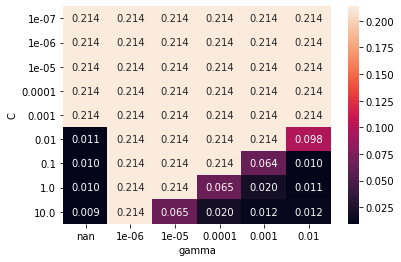

In [29]:
import seaborn as sns

results_adult = pd.DataFrame( model_adult.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results_adult['score_acc'] = 1 - model_adult.cv_results_['mean_test_accuracy']

# get rid of classifier__XX in columns
cols_adult = results_adult.columns.to_series().str.split('__').apply(lambda x: x[-1])
results_adult.columns = cols_adult


# lets show the results for the saga solver across penalty & C values
ax_adult = sns.heatmap( results_adult.query('kernel=="rbf"').pivot('C','gamma','score_acc'),
             annot=True, fmt='.3f')

### LETTER Dataset

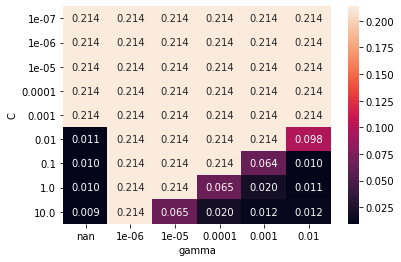

In [30]:
results_letter = pd.DataFrame( model_letter.cv_results_['params'] )
results_letter['score_acc'] = 1 - model_letter.cv_results_['mean_test_accuracy']
cols_letter = results_letter.columns.to_series().str.split('__').apply(lambda x: x[-1])
results_letter.columns = cols_letter
ax_letter = sns.heatmap( results_letter.query('kernel=="rbf"').pivot('C','gamma','score_acc'),
             annot=True, fmt='.3f')

### CHESS Dataset

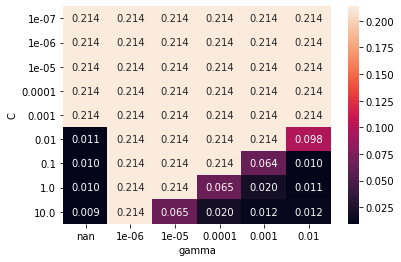

In [31]:
results_chess = pd.DataFrame( model_chess.cv_results_['params'] )
results_chess['score_acc'] = 1 - model_chess.cv_results_['mean_test_accuracy']
cols_chess = results_chess.columns.to_series().str.split('__').apply(lambda x: x[-1])
results_chess.columns = cols_chess
ax_chess = sns.heatmap( results_chess.query('kernel=="rbf"').pivot('C','gamma','score_acc'),
             annot=True, fmt='.3f')

### OCCUPANCY Dataset

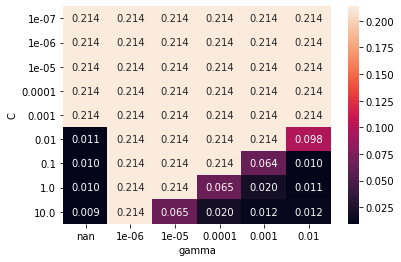

In [32]:
results_occupancy = pd.DataFrame( model_occupancy.cv_results_['params'] )
results_occupancy['score_acc'] = 1 - model_occupancy.cv_results_['mean_test_accuracy']
cols_occupancy = results_occupancy.columns.to_series().str.split('__').apply(lambda x: x[-1])
results_occupancy.columns = cols_occupancy
ax_occupancy = sns.heatmap( results_occupancy.query('kernel=="rbf"').pivot('C','gamma','score_acc'),
             annot=True, fmt='.3f')